# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [112]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [113]:
from matplotlib import rcParams

# Configurar Matplotlib para usar DejaVu Sans
rcParams['font.family'] = 'DejaVu Sans'

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [114]:
customer = pd.read_csv('../data/Wholesale_customers_data.csv',header=0)
customer.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [115]:
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Variable definition:

- 1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
- 2)	MILK: annual spending (m.u.) on milk products (Continuous);
- 3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
- 4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
- 5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- 6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
- 7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
- 8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

In [116]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Observamos que no tenemos valores nulos, por lo tanto no tenemos que hacer ningún tratamieno al respecto.

Tenemos dos columnas de datos categóricos: Channel y Region, pero ya se ha hecho la previa transformación de los datos a integers. 
La equivalencia original, par auna futura correcta interpretación de los datos,sería:


In [117]:
customer['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [118]:
channel_meaning= {
    1: 'Horeca',
    2: 'Retail'
}

In [42]:
customer['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [119]:
region_meaning= {
    1: 'Lisbon',
    2: 'Oporto',
    3: 'Other Region'
}

In [126]:
#Definimos columnas realmente numéricas
X = customer[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

¿Existe colinealidad entre columnas?

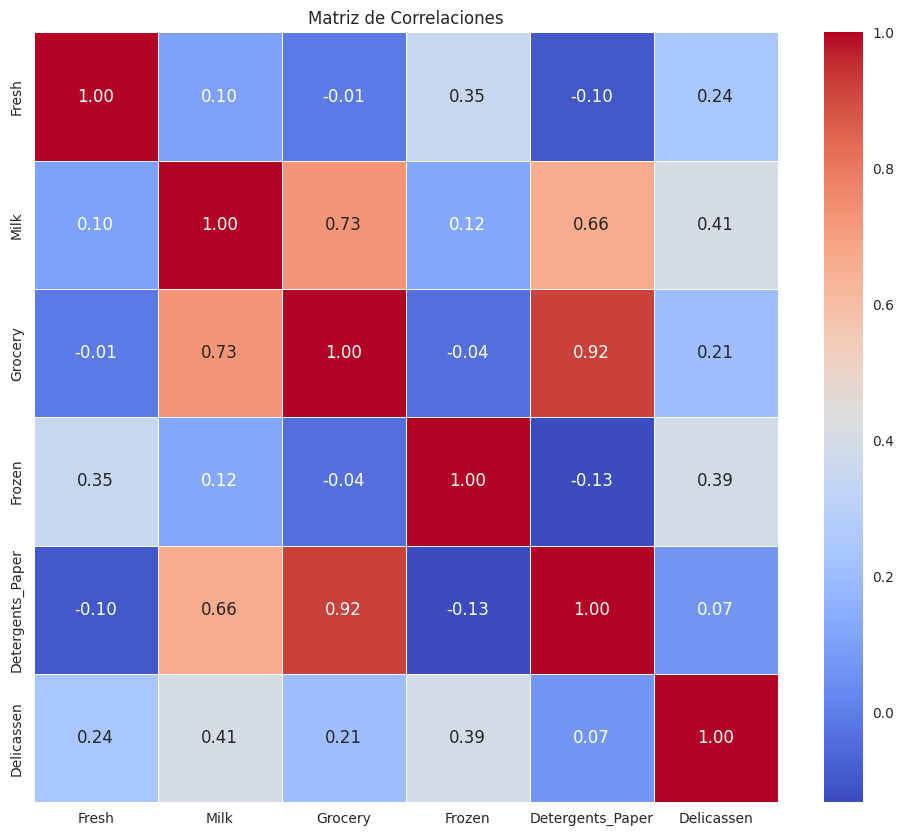

In [129]:
# Calcular la matriz de correlaciones
matriz_correlaciones = X.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

Podemos observar una fuerte correlación entre 'Detergents_Paper' y 'Grocery'

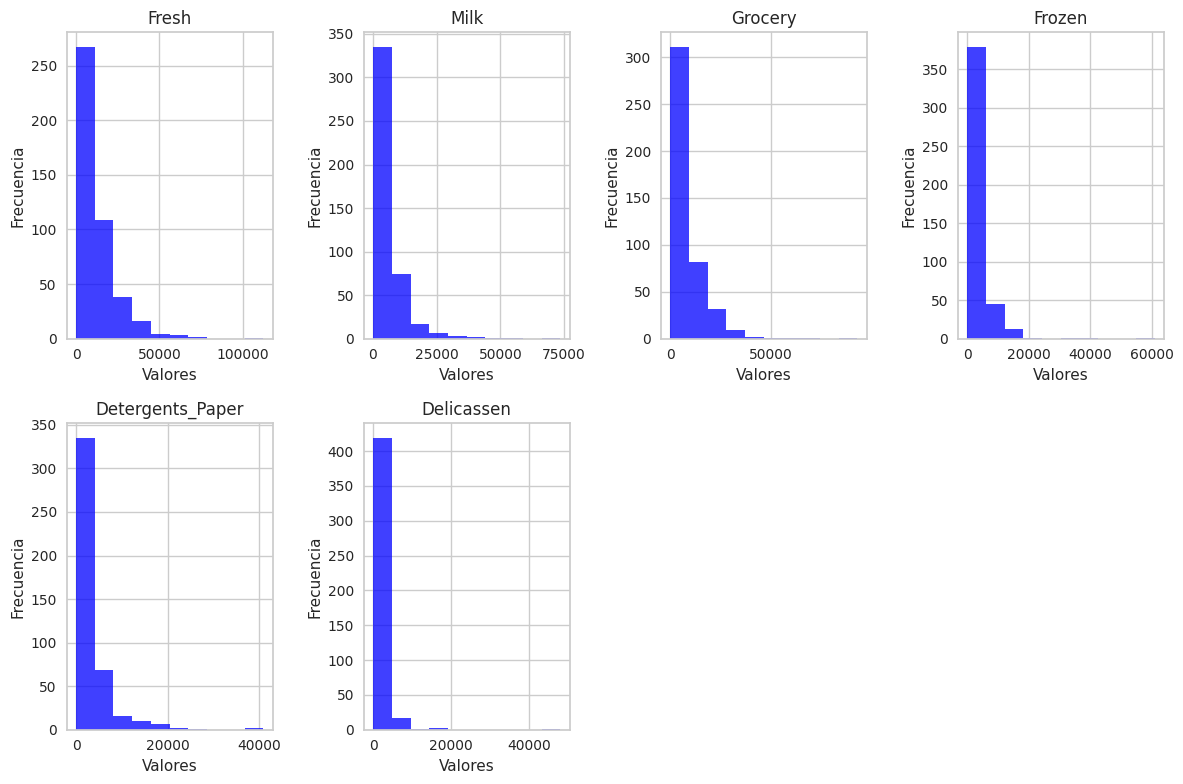

In [130]:
# Definir el tamaño de la figura para los histogramas
plt.figure(figsize=(12, 8))

# Iterar sobre las columnas del DataFrame
for i, columna in enumerate(X):
    plt.subplot(2, 4, i + 1)  # Crear subgráficos en una cuadrícula de 2 filas y 4 columnas
    plt.hist(customer[columna], bins=10, alpha=0.75, color='blue')
    plt.title(columna)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

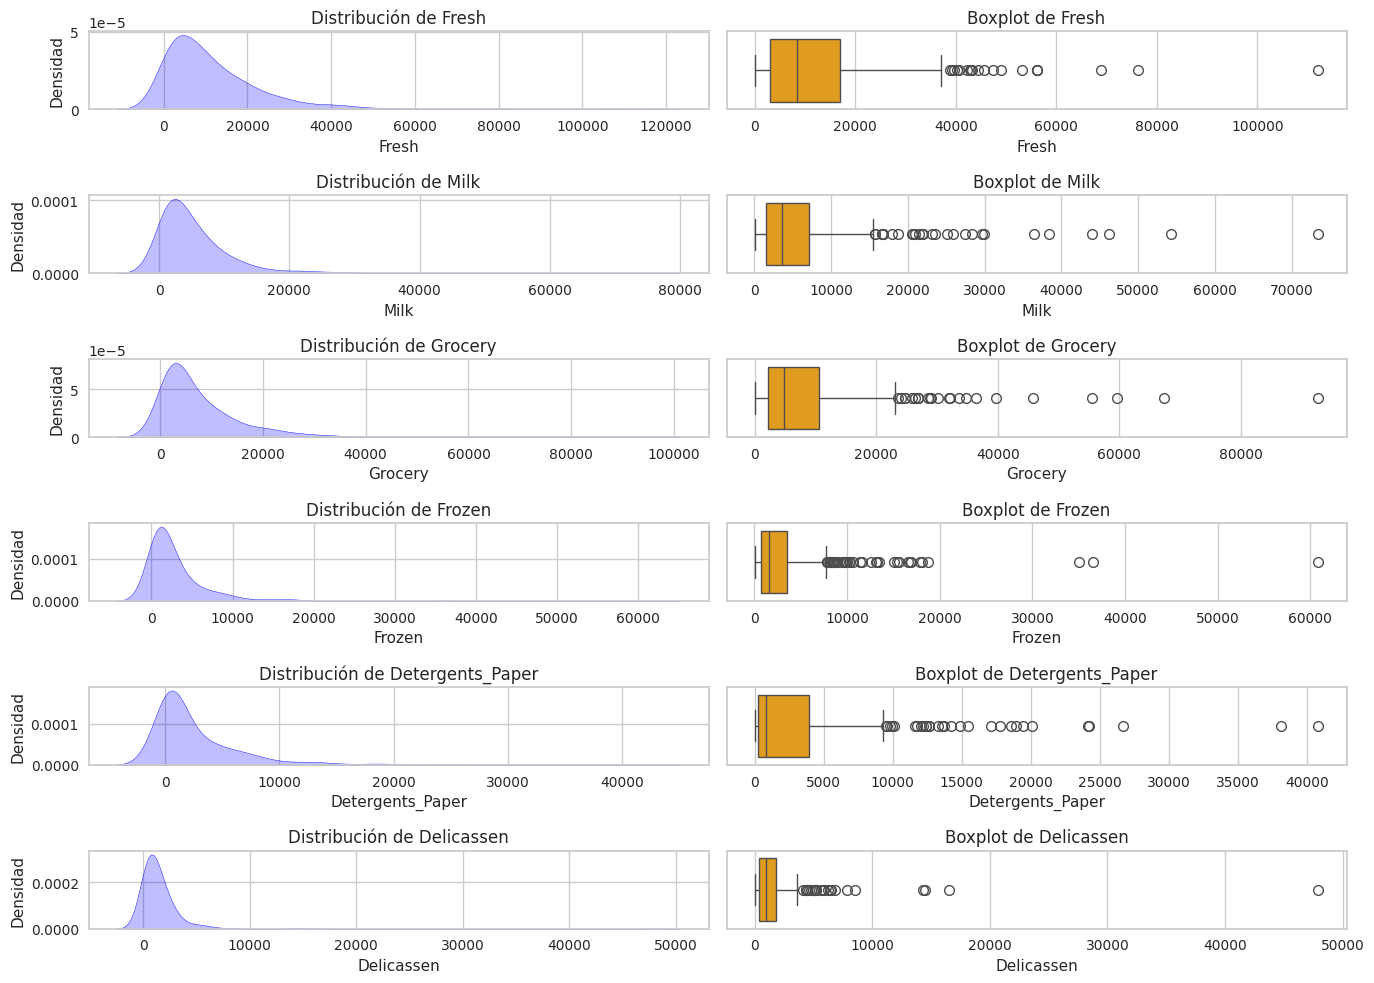

In [136]:
# Obtener las columnas numéricas de X
columnas_numericas = X.columns

# Configurar el tamaño de las figuras
plt.figure(figsize=(14, 10))

# Crear subplots para cada columna numérica
for i, columna in enumerate(columnas_numericas):
    # Diagrama de densidad (KDE)
    plt.subplot(len(columnas_numericas), 2, 2 * i + 1)
    sns.kdeplot(X[columna], fill=True, color='blue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')

    # Diagrama de caja (Boxplot)
    plt.subplot(len(columnas_numericas), 2, 2 * i + 2)
    sns.boxplot(x=X[columna], color='orange')
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.show()

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [137]:
# Filtramos valores atípicos.
# Definir los umbrales para cada columna
thresholds = {
    'Fresh': 60000,
    'Milk': 50000,
    'Grocery': 60000,
    'Frozen': 30000,
    'Delicassen': 40000,
    'Detergents_Paper': 30000
}

# Aplicar filtros para eliminar los valores atípicos
filtered_customer = customer.copy()  # Crear una copia del DataFrame original

for column, threshold in thresholds.items():
    filtered_customer = filtered_customer[filtered_customer[column] <= threshold]

# Verificar el resultado
print("Número de registros antes de eliminar valores atípicos:", len(customer))
print("Número de registros después de eliminar valores atípicos:", len(filtered_customer))

# Mostrar las primeras filas del DataFrame filtrado para confirmar
print(filtered_customer.head())


Número de registros antes de eliminar valores atípicos: 440
Número de registros después de eliminar valores atípicos: 430
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [138]:
filtered_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           430 non-null    int64
 1   Region            430 non-null    int64
 2   Fresh             430 non-null    int64
 3   Milk              430 non-null    int64
 4   Grocery           430 non-null    int64
 5   Frozen            430 non-null    int64
 6   Detergents_Paper  430 non-null    int64
 7   Delicassen        430 non-null    int64
dtypes: int64(8)
memory usage: 30.2 KB


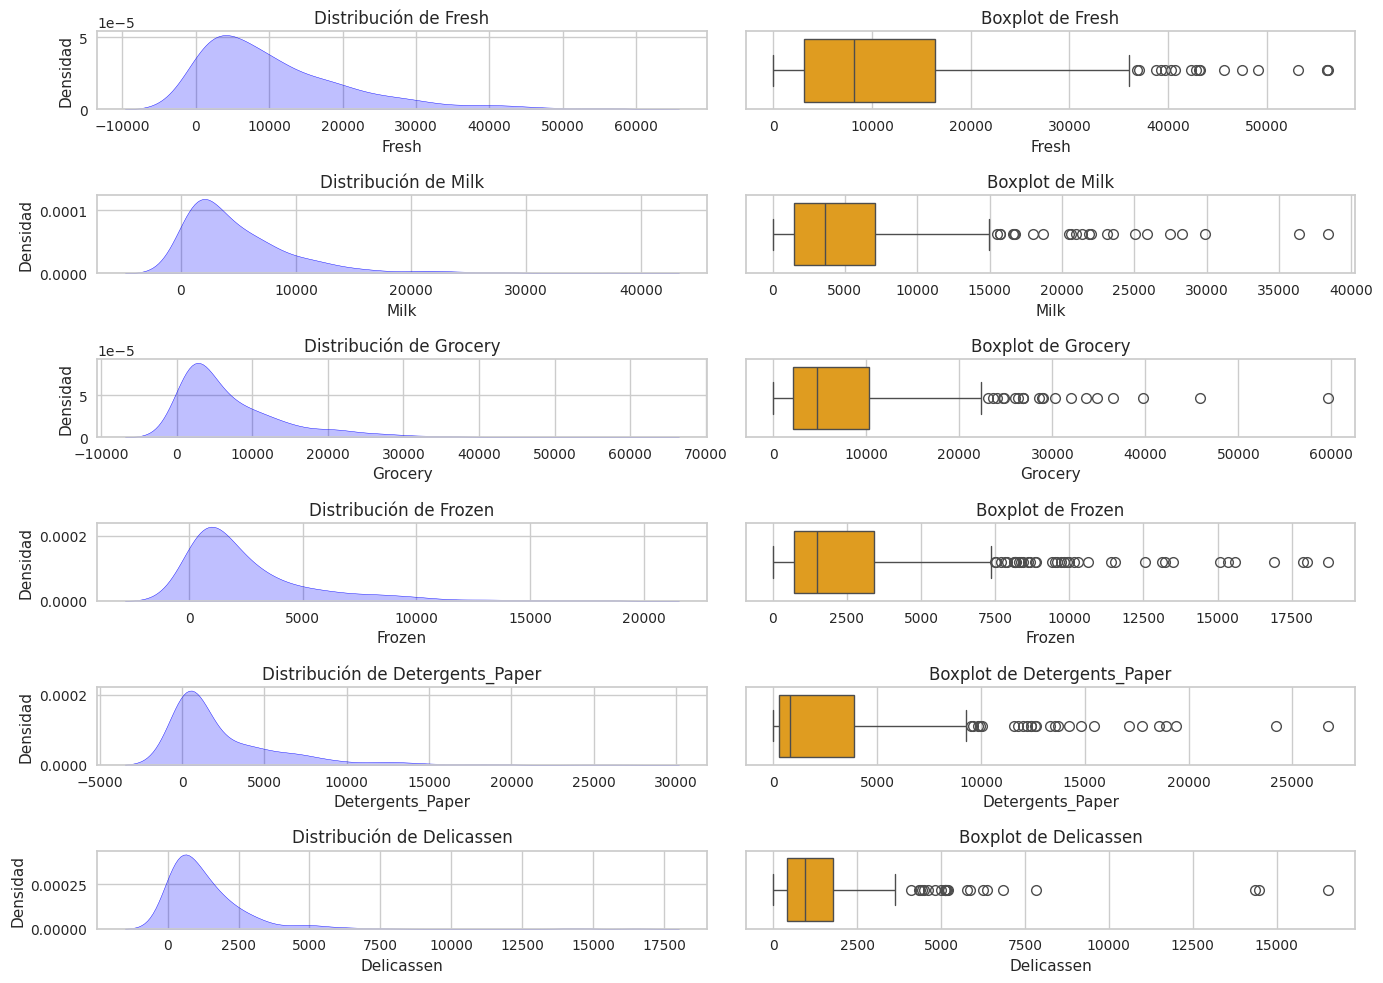

In [140]:
#Definimos columnas realmente numéricas
filtered_X = filtered_customer[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Obtener las columnas numéricas de X
columnas_numericas_filtered = filtered_X.columns

# Configurar el tamaño de las figuras
plt.figure(figsize=(14, 10))

# Crear subplots para cada columna numérica
for i, columna in enumerate(columnas_numericas_filtered):
    # Diagrama de densidad (KDE)
    plt.subplot(len(columnas_numericas_filtered), 2, 2 * i + 1)
    sns.kdeplot(filtered_X[columna], fill=True, color='blue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')

    # Diagrama de caja (Boxplot)
    plt.subplot(len(columnas_numericas_filtered), 2, 2 * i + 2)
    sns.boxplot(x=filtered_X[columna], color='orange')
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.show()

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customers_scale = scaler.fit_transform(filtered_X)

customers_scale




array([[ 0.12848568,  0.79376144,  0.02234922, -0.78426407,  0.00789357,
        -0.02192008],
       [-0.39015178,  0.82169083,  0.2824722 , -0.29879092,  0.16715905,
         0.23688306],
       [-0.4552125 ,  0.63996846,  0.03829098, -0.09713766,  0.2245358 ,
         3.82231108],
       ...,
       [ 0.3005639 ,  1.85145095,  2.96211473, -0.71432834,  3.13839952,
         0.29065267],
       [-0.0913715 , -0.59817391, -0.66833108, -0.52584684, -0.63688723,
         0.44309835],
       [-0.78476724, -0.64949869, -0.63230009, -0.83099243, -0.55738313,
        -0.78178501]])

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [144]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42)

kmeans.fit(customers_scale)

filtered_customer['labels'] = kmeans.labels_

# Mostrar las primeras filas del DataFrame con las etiquetas de cluster
print(filtered_customer.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       6  
1        1776       6  
2        7844       7  
3        1788       5  
4        5185       0  


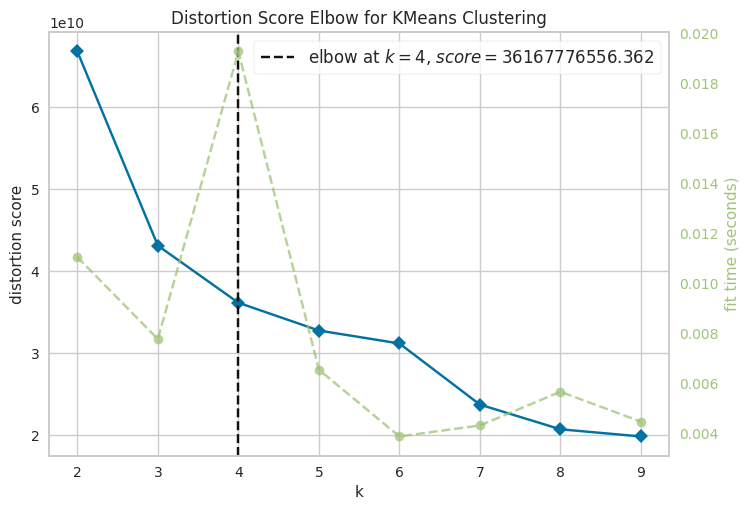

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [145]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the KMeans model
# k=(2,10) indicates the range of number of clusters to try (from 2 to 10)
visualizer = KElbowVisualizer(kmeans, k=(2,10))

# Fit the visualizer to the data
# This will run K-means clustering for each value of k and calculate the distortion score for each
visualizer.fit(filtered_X)

# Render the plot
# The Elbow plot displays the distortion score for each k
# The point where the distortion score starts to level off ('elbow') is the recommended number of clusters
visualizer.show()

### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [146]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()
print(clusters)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

Cuenta los valores en `labels`.

In [79]:
len(labels)


440

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [147]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

filtered_customer['labels_DBSCAN'] = dbscan.labels_

Cuenta los valores en `labels_DBSCAN`.

In [148]:
filtered_customer.info()


<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           430 non-null    int64
 1   Region            430 non-null    int64
 2   Fresh             430 non-null    int64
 3   Milk              430 non-null    int64
 4   Grocery           430 non-null    int64
 5   Frozen            430 non-null    int64
 6   Detergents_Paper  430 non-null    int64
 7   Delicassen        430 non-null    int64
 8   labels            430 non-null    int32
 9   labels_DBSCAN     430 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 35.3 KB


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

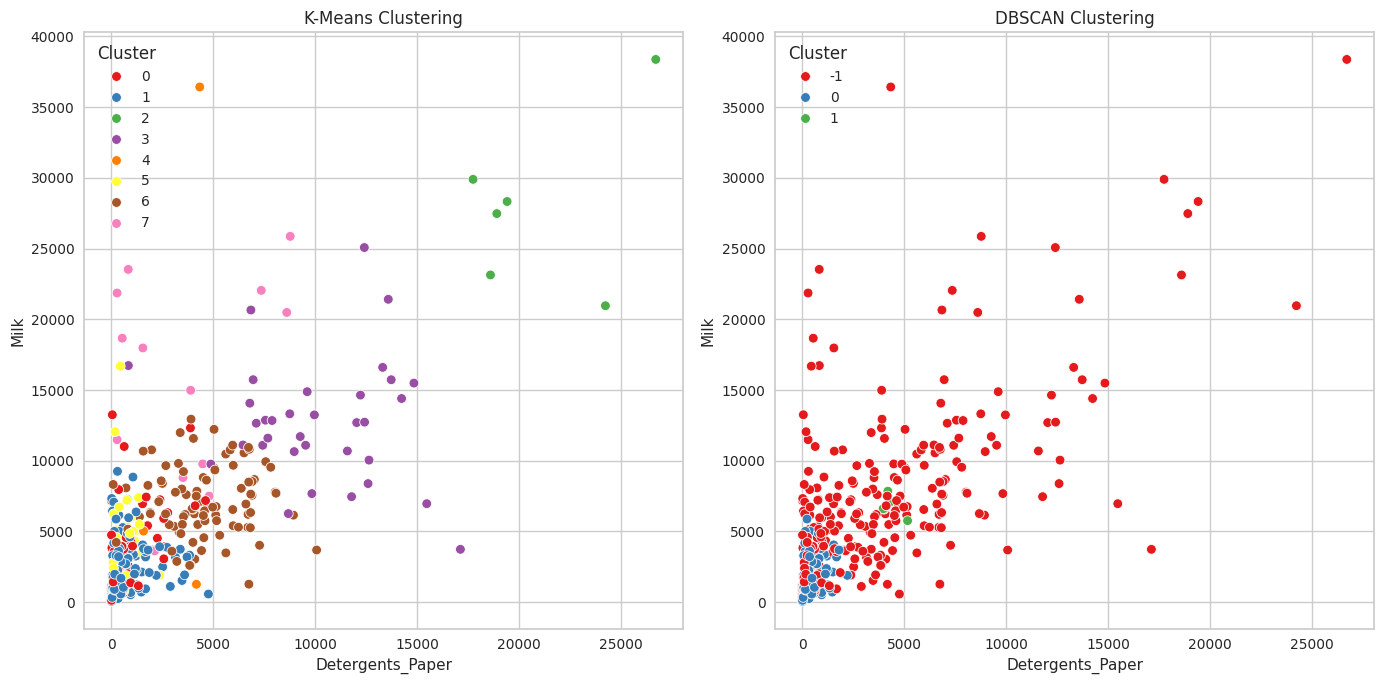

In [149]:
# Función para trazar gráficos de dispersión
def plot(x, y, hue, title):
    sns.scatterplot(x=x, y=y, hue=hue, palette='Set1', marker='o')
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(title='Cluster')

# Crear gráficos para comparar K-Means y DBSCAN
plt.figure(figsize=(14, 7))

# Gráfico de K-Means
plt.subplot(1, 2, 1)
plot(filtered_customer['Detergents_Paper'], filtered_customer['Milk'], filtered_customer['labels'], 'K-Means Clustering')

# Gráfico de DBSCAN
plt.subplot(1, 2, 2)
plot(filtered_customer['Detergents_Paper'], filtered_customer['Milk'], filtered_customer['labels_DBSCAN'], 'DBSCAN Clustering')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

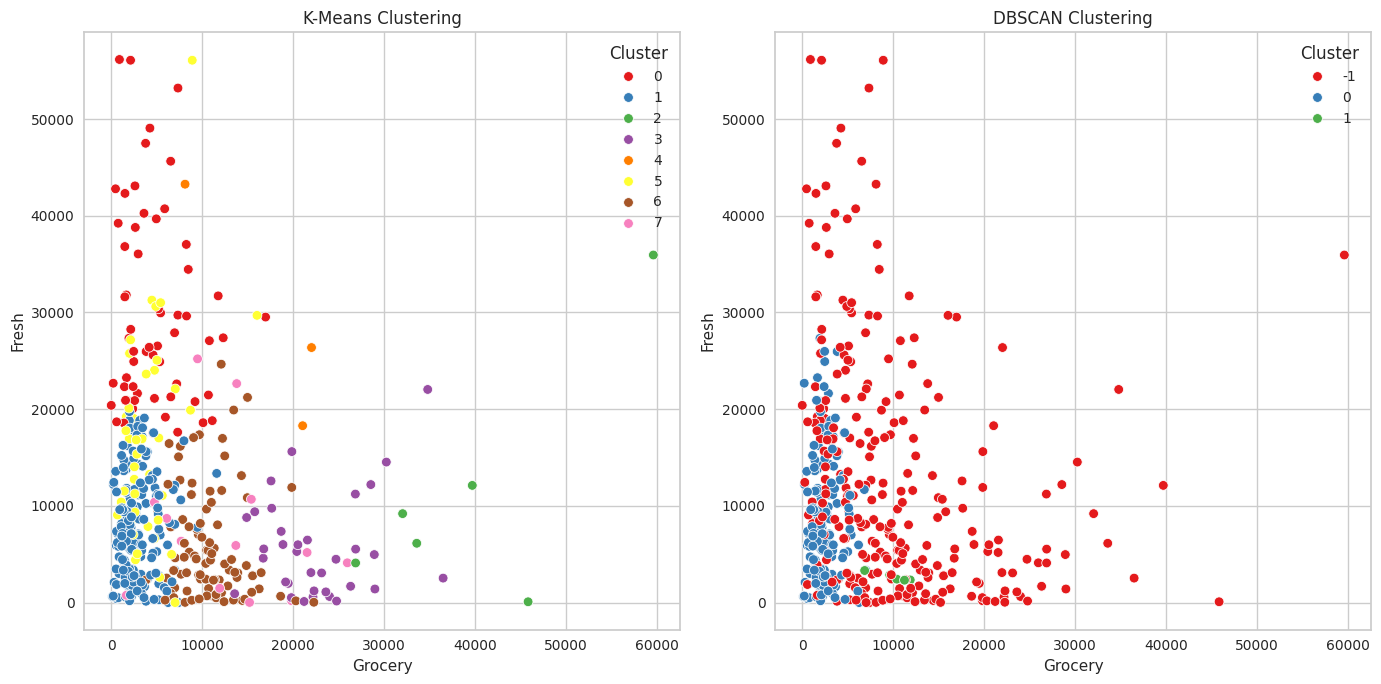

In [150]:
# Función para trazar gráficos de dispersión
def plot(x, y, hue, title):
    sns.scatterplot(x=x, y=y, hue=hue, palette='Set1', marker='o')
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(title='Cluster')

# Crear gráficos para comparar K-Means y DBSCAN
plt.figure(figsize=(14, 7))

# Gráfico de K-Means
plt.subplot(1, 2, 1)
plot(filtered_customer['Grocery'], filtered_customer['Fresh'], filtered_customer['labels'], 'K-Means Clustering')

# Gráfico de DBSCAN
plt.subplot(1, 2, 2)
plot(filtered_customer['Grocery'], filtered_customer['Fresh'], filtered_customer['labels_DBSCAN'], 'DBSCAN Clustering')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

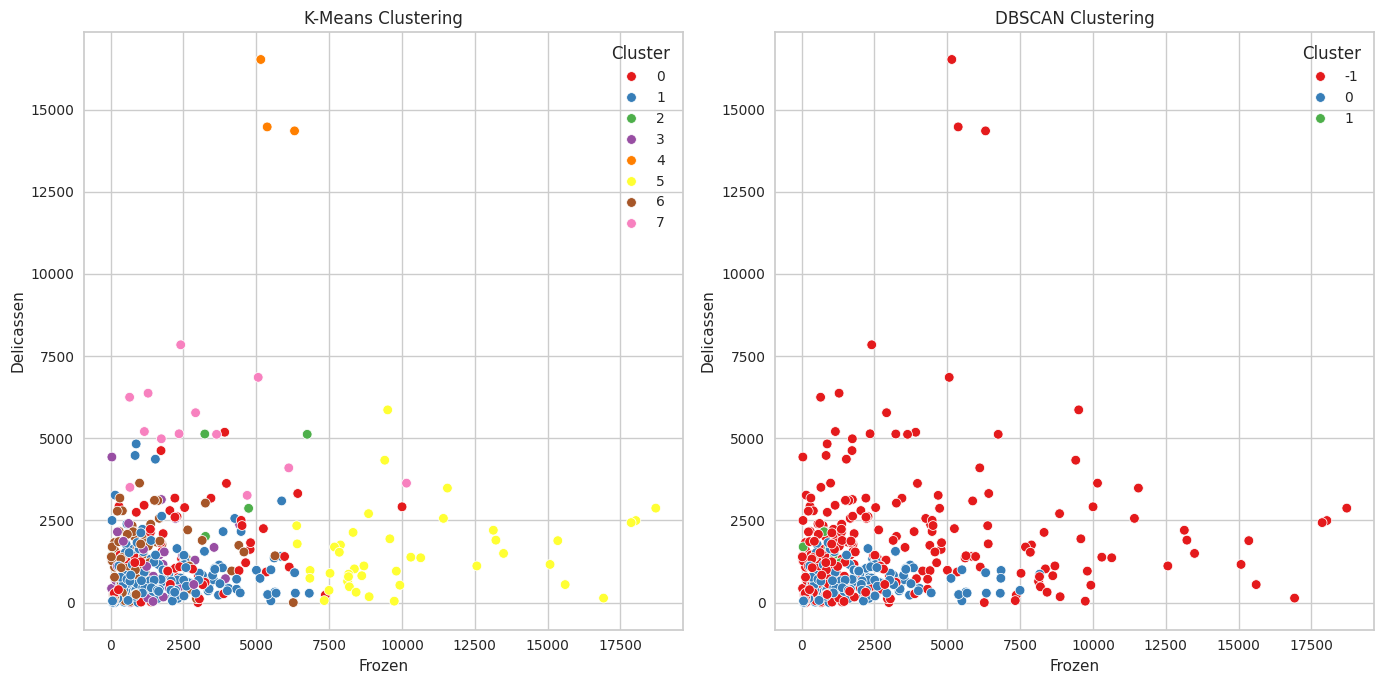

In [151]:
# Función para trazar gráficos de dispersión
def plot(x, y, hue, title):
    sns.scatterplot(x=x, y=y, hue=hue, palette='Set1', marker='o')
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(title='Cluster')

# Crear gráficos para comparar K-Means y DBSCAN
plt.figure(figsize=(14, 7))

# Gráfico de K-Means
plt.subplot(1, 2, 1)
plot(filtered_customer['Frozen'], filtered_customer['Delicassen'], filtered_customer['labels'], 'K-Means Clustering')

# Gráfico de DBSCAN
plt.subplot(1, 2, 2)
plot(filtered_customer['Frozen'], filtered_customer['Delicassen'], filtered_customer['labels_DBSCAN'], 'DBSCAN Clustering')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [152]:
# Agrupar por etiquetas de K-Means y calcular la media
mean_by_kmeans = filtered_customer.groupby('labels').mean()

# Agrupar por etiquetas de DBSCAN y calcular la media
mean_by_dbscan = filtered_customer.groupby('labels_DBSCAN').mean()

# Mostrar los resultados
print("Media por grupos K-Means:")
print(mean_by_kmeans)

print("\nMedia por grupos DBSCAN:")
print(mean_by_dbscan)

Media por grupos K-Means:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.166667  2.516667  29885.433333   3645.100000   4752.450000   
1       1.043716  2.508197   7641.163934   2239.010929   2852.961749   
2       2.000000  2.333333  11262.666667  28025.166667  39601.000000   
3       2.000000  2.441176   5691.735294  12764.352941  22561.647059   
4       1.333333  3.000000  29309.666667  14238.000000  17059.333333   
5       1.071429  2.571429  16225.690476   3715.880952   4131.238095   
6       1.775281  2.662921   5912.887640   7124.955056  10937.584270   
7       1.538462  2.307692   7817.846154  15892.461538  12846.615385   

              Frozen  Detergents_Paper    Delicassen  labels_DBSCAN  
labels                                                               
0        2604.850000        926.183333   1612.616667      -0.833333  
1        1854.836066        645.923497    8

¿Qué algoritmo funciona mejor?

Observamos 

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
